## Name: Srikant Kumar Sahoo

For this assignment, you will practice downloadings, cleaning, and analyzing data from the National Risk Index (NRI) and the CDC Social Vulnerability Index (SVI).

Preparation
Create a ‘data’ folder in the root directory of your repository. DONE
Inside the ‘data’ folder, create a ‘raw’ folder. DONE
Add and commit a ‘.gitignore’ file to the root directory of this repository that excludes all contents of the ‘data’ folder. DONE
Download the county-level NRI and SVI data for the entire United States. Place the data in the ‘data/raw’ folder. DONE
In the repository README, provide a brief (1-2 sentence) description of each file in the ‘data’ folder and a link to the original source of the data. DONE



## Task 1 - NRI Data Cleaning

1. Import the NRI data. Ensure that the FIPS code variable (‘STCOFIPS’) is correctly identified as a string / character variable. Otherwise, the leading zeros will be removed.

In [5]:
import pandas as pd
import os
os.getcwd()
# Import and identify 'STCOFIPS' as string
nri_data = pd.read_csv('data/raw/NRI_Table_Counties.csv', dtype={'STCOFIPS': str})
# Check the first few rows to confirm
print(nri_data.head())

   OID_  NRI_ID    STATE STATEABBRV  STATEFIPS   COUNTY COUNTYTYPE  \
0     1  C01001  Alabama         AL          1  Autauga     County   
1     2  C01003  Alabama         AL          1  Baldwin     County   
2     3  C01005  Alabama         AL          1  Barbour     County   
3     4  C01007  Alabama         AL          1     Bibb     County   
4     5  C01009  Alabama         AL          1   Blount     County   

   COUNTYFIPS STCOFIPS  POPULATION  ...  WNTW_EALS            WNTW_EALR  \
0           1     1001       58764  ...  15.784587             Very Low   
1           3     1003      231365  ...  56.205509  Relatively Moderate   
2           5     1005       25160  ...  18.632002       Relatively Low   
3           7     1007       22239  ...  13.308573             Very Low   
4           9     1009       58992  ...  23.645930       Relatively Low   

      WNTW_ALRB     WNTW_ALRP     WNTW_ALRA WNTW_ALR_NPCTL    WNTW_RISKV  \
0  2.687720e-07  7.410080e-09  8.725780e-06      10.

2. Subset the NRI data to include only the 5-digit state/county FIPS code and all colums ending with '\_AFREQ' and '\_RISKR'. Each of these columns represents a different hazard type.__

In [6]:
# Subsetting the NRI data to include 'STCOFIPS' and columns ending with '_AFREQ' and '_RISKR'
subset_columns = ['STCOFIPS']  # Start with 'STCOFIPS'
subset_columns.extend([col for col in nri_data.columns if col.endswith('_AFREQ') or col.endswith('_RISKR')])
# Create the subset of the data
nri_subset = nri_data[subset_columns]
# Check the first few rows to confirm
print(nri_subset.head())

  STCOFIPS  AVLN_AFREQ      AVLN_RISKR  CFLD_AFREQ      CFLD_RISKR  \
0     1001         NaN  Not Applicable         NaN  Not Applicable   
1     1003         NaN  Not Applicable    3.684142  Relatively Low   
2     1005         NaN  Not Applicable         NaN  Not Applicable   
3     1007         NaN  Not Applicable         NaN  Not Applicable   
4     1009         NaN  Not Applicable         NaN  Not Applicable   

   CWAV_AFREQ CWAV_RISKR  DRGT_AFREQ           DRGT_RISKR  ERQK_AFREQ  ...  \
0         0.0  No Rating   25.969774       Relatively Low    0.000431  ...   
1         0.0  No Rating   12.353442  Relatively Moderate    0.000338  ...   
2         0.0  No Rating   43.956953       Relatively Low    0.000227  ...   
3         0.0  No Rating   28.894501             Very Low    0.000790  ...   
4         0.0  No Rating   28.152598       Relatively Low    0.000817  ...   

  TRND_AFREQ           TRND_RISKR TSUN_AFREQ         TSUN_RISKR VLCN_AFREQ  \
0   0.480184  Relatively Moderat

3. Create a table / dataframe that, for each hazard type, shows the number of missing values in the '\_AFREQ' and '\_RISKR' columns.__

In [7]:
# Select only columns ending with '_AFREQ' and '_RISKR' from the subset
afreq_riskr_columns = [col for col in nri_subset.columns if col.endswith('_AFREQ') or col.endswith('_RISKR')]
# Create a dataframe to store the number of missing values for each column
missing_values = nri_subset[afreq_riskr_columns].isnull().sum()
# Convert the result into a more readable dataframe
missing_values_df = pd.DataFrame(missing_values, columns=['Missing_Values'])
# Display the missing values table
print(missing_values_df)

            Missing_Values
AVLN_AFREQ            3023
AVLN_RISKR               0
CFLD_AFREQ            2646
CFLD_RISKR               0
CWAV_AFREQ               0
CWAV_RISKR               0
DRGT_AFREQ               7
DRGT_RISKR               0
ERQK_AFREQ               0
ERQK_RISKR               0
HAIL_AFREQ               7
HAIL_RISKR               0
HWAV_AFREQ               0
HWAV_RISKR               0
HRCN_AFREQ             918
HRCN_RISKR               0
ISTM_AFREQ             229
ISTM_RISKR               0
LNDS_AFREQ              40
LNDS_RISKR               0
LTNG_AFREQ             123
LTNG_RISKR               0
RFLD_AFREQ               0
RFLD_RISKR               0
SWND_AFREQ               7
SWND_RISKR               0
TRND_AFREQ               7
TRND_RISKR               0
TSUN_AFREQ            3103
TSUN_RISKR               0
VLCN_AFREQ            3125
VLCN_RISKR               0
WFIR_AFREQ              88
WFIR_RISKR               0
WNTW_AFREQ               0
WNTW_RISKR               0


4. Create a new column in the original data table indicating whether or not 'AVLN_AFREQ' is missing or observed. Show the cross-tabulation of the 'AVLN_AFREQ' missingness and 'AVLN_RISKR' columns (including missing values). What do you observe?__

In [8]:
# Create a new column 'AVLN_AFREQ_missing' indicating if 'AVLN_AFREQ' is missing
nri_data['AVLN_AFREQ_missing'] = nri_data['AVLN_AFREQ'].isnull()
# Create a cross-tabulation of 'AVLN_AFREQ_missing' and 'AVLN_RISKR', including missing values
cross_tab = pd.crosstab(nri_data['AVLN_AFREQ_missing'], nri_data['AVLN_RISKR'], dropna=False)
# Display the cross-tabulation
print(cross_tab)

AVLN_RISKR          Not Applicable  Relatively High  Relatively Low  \
AVLN_AFREQ_missing                                                    
False                            0               15              52   
True                          3023                0               0   

AVLN_RISKR          Relatively Moderate  Very High  Very Low  
AVLN_AFREQ_missing                                            
False                                33          9        99  
True                                  0          0         0  


When AVLN_AFREQ is absent, AVLN_RISKR is usually labeled as "Not Applicable," indicating that counties without avalanche frequency data are generally not given an avalanche risk rating. In contrast, when the frequency data is available (AVLN_AFREQ is present), various risk levels, from Very Low to Relatively High are typically assigned.

5. Assuming that a risk that is "not applicable" to a county has an annualized frequency of 0, impute the relevant missing values in the '\_AFREQ' columns with 0.__

In [9]:
# Identify '_AFREQ' columns
afreq_columns = [col for col in nri_subset.columns if col.endswith('_AFREQ')]

# Impute missing values in the '_AFREQ' columns with 0, where the corresponding '_RISKR' is "Not Applicable"
for afreq_col in afreq_columns:
    # Find the corresponding '_RISKR' column
    riskr_col = afreq_col.replace('_AFREQ', '_RISKR')
    # Impute missing '_AFREQ' values with 0 where '_RISKR' is "Not Applicable"
    nri_data.loc[nri_data[riskr_col] == 'Not Applicable', afreq_col] = 0

# Verify that the imputation worked by checking the data
print(nri_data[afreq_columns].head())

   AVLN_AFREQ  CFLD_AFREQ  CWAV_AFREQ  DRGT_AFREQ  ERQK_AFREQ  HAIL_AFREQ  \
0         0.0    0.000000         0.0   25.969774    0.000431    2.806764   
1         0.0    3.684142         0.0   12.353442    0.000338    1.529256   
2         0.0    0.000000         0.0   43.956953    0.000227    1.908785   
3         0.0    0.000000         0.0   28.894501    0.000790    3.447868   
4         0.0    0.000000         0.0   28.152598    0.000817    5.101344   

   HWAV_AFREQ  HRCN_AFREQ  ISTM_AFREQ  LNDS_AFREQ  LTNG_AFREQ  RFLD_AFREQ  \
0    0.371517    0.080450    0.402025     0.01000   78.938052    1.083333   
1    0.939761    0.248233    0.191996     0.01056  142.231875    2.708333   
2    0.371517    0.116398    0.393288     0.01000   74.655092    0.250000   
3    0.371517    0.066724    0.413094     0.01000   84.589029    0.666667   
4    0.371517    0.039238    0.509665     0.01000   88.777653    1.166667   

   SWND_AFREQ  TRND_AFREQ  TSUN_AFREQ  VLCN_AFREQ  WFIR_AFREQ  WNTW_AFREQ 

## Task 2 - SVI Data Cleaning

1. Import the SVI data. Ensure that the FIPS code is correctly identified as a string / character variable. Otherwise, the leading zeros will be removed.__

In [10]:
# Define the file path to the SVI data
svi_file_path = 'data/raw/SVI_2022_US_county.csv'
# Import the SVI data, ensuring 'FIPS' is read as a string
svi_data = pd.read_csv(svi_file_path, dtype={'FIPS': str})
# Check the first few rows to confirm
print(svi_data.head())

   ST    STATE ST_ABBR  STCNTY          COUNTY  FIPS                 LOCATION  \
0   1  Alabama      AL    1001  Autauga County  1001  Autauga County, Alabama   
1   1  Alabama      AL    1003  Baldwin County  1003  Baldwin County, Alabama   
2   1  Alabama      AL    1005  Barbour County  1005  Barbour County, Alabama   
3   1  Alabama      AL    1007     Bibb County  1007     Bibb County, Alabama   
4   1  Alabama      AL    1009   Blount County  1009   Blount County, Alabama   

     AREA_SQMI  E_TOTPOP  M_TOTPOP  ...  EP_ASIAN  MP_ASIAN  EP_AIAN  MP_AIAN  \
0   594.454786     58761         0  ...       1.1       0.4      0.1      0.1   
1  1589.861817    233420         0  ...       0.9       0.1      0.2      0.1   
2   885.007619     24877         0  ...       0.5       0.1      0.3      0.1   
3   622.469286     22251         0  ...       0.3       0.4      0.1      0.1   
4   644.890376     59077         0  ...       0.2       0.2      0.1      0.1   

   EP_NHPI  MP_NHPI  EP_TW

Subset the SVI data to include only the following columns:__
`ST, STATE, ST_ABBR, STCNTY, COUNTY, FIPS, LOCATION, AREA_SQMI, E_TOTPOP, EP_POV150, EP_UNEMP, EP_HBURD, EP_NOHSDP, EP_UNINSUR, EP_AGE65, EP_AGE17, EP_DISABL, EP_SNGPNT, EP_LIMENG, EP_MINRTY, EP_MUNIT, EP_MOBILE, EP_CROWD, EP_NOVEH, EP_GROUPQ, EP_NOINT, EP_AFAM, EP_HISP, EP_ASIAN, EP_AIAN, EP_NHPI, EP_TWOMORE, EP_OTHERRACE`

In [11]:
# Define the columns to include in the subset
svi_columns = [
    'ST', 'STATE', 'ST_ABBR', 'STCNTY', 'COUNTY', 'FIPS', 'LOCATION', 'AREA_SQMI', 'E_TOTPOP', 
    'EP_POV150', 'EP_UNEMP', 'EP_HBURD', 'EP_NOHSDP', 'EP_UNINSUR', 'EP_AGE65', 'EP_AGE17', 
    'EP_DISABL', 'EP_SNGPNT', 'EP_LIMENG', 'EP_MINRTY', 'EP_MUNIT', 'EP_MOBILE', 'EP_CROWD', 
    'EP_NOVEH', 'EP_GROUPQ', 'EP_NOINT', 'EP_AFAM', 'EP_HISP', 'EP_ASIAN', 'EP_AIAN', 'EP_NHPI', 
    'EP_TWOMORE', 'EP_OTHERRACE'
]
# Subset the SVI data to include only these columns
svi_subset = svi_data[svi_columns]

2. Create a table / dataframe that shows the number of missing values in each column. (Hint: if you wrote a function for Task 1, you can reuse it here.)__  

In [12]:
# Calculate the number of missing values for each column
missing_values_svi = svi_subset.isnull().sum()

# Convert the result into a more readable dataframe
missing_values_svi_df = pd.DataFrame(missing_values_svi, columns=['Missing_Values'])

# Display the table of missing values
print(missing_values_svi_df)
# your code here

              Missing_Values
ST                         0
STATE                      0
ST_ABBR                    0
STCNTY                     0
COUNTY                     0
FIPS                       0
LOCATION                   0
AREA_SQMI                  0
E_TOTPOP                   0
EP_POV150                  0
EP_UNEMP                   0
EP_HBURD                   0
EP_NOHSDP                  0
EP_UNINSUR                 0
EP_AGE65                   0
EP_AGE17                   0
EP_DISABL                  0
EP_SNGPNT                  0
EP_LIMENG                  0
EP_MINRTY                  0
EP_MUNIT                   0
EP_MOBILE                  0
EP_CROWD                   0
EP_NOVEH                   0
EP_GROUPQ                  0
EP_NOINT                   0
EP_AFAM                    0
EP_HISP                    0
EP_ASIAN                   0
EP_AIAN                    0
EP_NHPI                    0
EP_TWOMORE                 0
EP_OTHERRACE               0


## Task 3 - Data Merging
__1. Identify any FIPS codes that are present in the NRI data but not in the SVI data and vice versa. Describe any discrepancies and possible causes? What to these discrepancies, if any, mean for interpreting results based on the merged dataset moving forward?__

In [13]:
# Extract the FIPS codes from both datasets
nri_fips = set(nri_data['STCOFIPS'])  # From NRI
svi_fips = set(svi_subset['FIPS'])    # From SVI

# Find FIPS codes present in NRI but not in SVI
fips_in_nri_not_svi = nri_fips - svi_fips

# Find FIPS codes present in SVI but not in NRI
fips_in_svi_not_nri = svi_fips - nri_fips

# Print the results
print(f"FIPS codes in NRI but not in SVI: {len(fips_in_nri_not_svi)}")
print(fips_in_nri_not_svi)

print(f"FIPS codes in SVI but not in NRI: {len(fips_in_svi_not_nri)}")
print(fips_in_svi_not_nri)

FIPS codes in NRI but not in SVI: 96
{'72043', '9007', '72137', '72079', '72067', '72005', '72029', '9005', '72117', '72037', '72059', '72073', '72071', '72045', '72033', '72135', '72009', '72047', '72049', '72115', '72013', '72023', '72065', '72031', '72053', '72041', '72119', '72001', '72011', '9009', '78020', '72095', '72145', '72083', '72121', '72015', '69110', '72125', '60010', '72087', '72105', '72153', '72089', '72055', '72127', '72027', '9003', '72019', '66010', '9015', '72099', '72054', '72139', '72111', '69120', '72003', '72075', '72039', '72143', '72091', '69100', '72109', '72129', '60020', '72057', '72007', '78010', '72103', '72063', '72151', '72069', '72061', '72017', '9011', '9001', '60050', '72101', '72085', '72147', '78030', '72021', '72051', '72141', '72081', '9013', '72113', '72131', '72123', '72149', '72097', '72025', '72035', '72077', '72133', '72107', '72093'}
FIPS codes in SVI but not in NRI: 9
{'9150', '9140', '9120', '9160', '9180', '9170', '9130', '9190', '9110

The differences in FIPS codes between the NRI and SVI datasets may stem from their varying geographic coverage. The NRI dataset includes U.S. territories such as American Samoa, Guam, the Northern Mariana Islands, Puerto Rico, and the U.S. Virgin Islands, which may not be represented in the SVI dataset. As a result, some counties might appear in one dataset but not in the other. These differences could impact the interpretation of results from the merged dataset, potentially introducing bias or limiting the generalizability of the findings. Additionally, when aggregating data at the state or regional level, missing counties could distort the outcomes. For instance, if a highly vulnerable or high-risk county is absent from one dataset, it could lead to under- or over-estimations of risk or vulnerability at broader scales.

2. Merge the NRI and SVI data on the FIPS code. Use an outer join to keep all counties in the final dataset.__

In [14]:
# Merge the NRI subset and SVI subset using an outer join on the FIPS code
merged_data = pd.merge(nri_subset, svi_subset, left_on='STCOFIPS', right_on='FIPS', how='outer')

# Check the first few rows to confirm the merge
print(merged_data.head())

  STCOFIPS  AVLN_AFREQ      AVLN_RISKR  CFLD_AFREQ           CFLD_RISKR  \
0    10001         NaN  Not Applicable    3.687000  Relatively Moderate   
1    10003         NaN  Not Applicable    3.687000  Relatively Moderate   
2    10005         NaN  Not Applicable    3.654749      Relatively High   
3     1001         NaN  Not Applicable         NaN       Not Applicable   
4     1003         NaN  Not Applicable    3.684142       Relatively Low   

   CWAV_AFREQ CWAV_RISKR  DRGT_AFREQ           DRGT_RISKR  ERQK_AFREQ  ...  \
0         0.0  No Rating    3.904782       Relatively Low    0.000330  ...   
1         0.0  No Rating    5.667769       Relatively Low    0.000399  ...   
2         0.0  No Rating    2.620629       Relatively Low    0.000247  ...   
3         0.0  No Rating   25.969774       Relatively Low    0.000431  ...   
4         0.0  No Rating   12.353442  Relatively Moderate    0.000338  ...   

  EP_NOVEH  EP_GROUPQ EP_NOINT  EP_AFAM EP_HISP  EP_ASIAN EP_AIAN  EP_NHPI  \
0 

3. Create a table / dataframe that shows the number of missing values in each column of the merged dataset.__

In [15]:
# Calculate the number of missing values for each column in the merged dataset
missing_values_merged = merged_data.isnull().sum()

# Convert the result into a more readable dataframe
missing_values_merged_df = pd.DataFrame(missing_values_merged, columns=['Missing_Values'])

# Display the table of missing values
print(missing_values_merged_df)

              Missing_Values
STCOFIPS                   9
AVLN_AFREQ              3032
AVLN_RISKR                 9
CFLD_AFREQ              2655
CFLD_RISKR                 9
...                      ...
EP_ASIAN                  96
EP_AIAN                   96
EP_NHPI                   96
EP_TWOMORE                96
EP_OTHERRACE              96

[70 rows x 1 columns]


## Task 4 - Data Analysis

1. For each numerical variable in the merged dataset, plot a histogram showing the distribution of values. (Hint: write a function to make the histogram for a single variable, then use a loop or apply function to make the histograms for all numerical variables)__

Index(['AVLN_AFREQ', 'CFLD_AFREQ', 'CWAV_AFREQ', 'DRGT_AFREQ', 'ERQK_AFREQ',
       'HAIL_AFREQ', 'HWAV_AFREQ', 'HRCN_AFREQ', 'ISTM_AFREQ', 'LNDS_AFREQ',
       'LTNG_AFREQ', 'RFLD_AFREQ', 'SWND_AFREQ', 'TRND_AFREQ', 'TSUN_AFREQ',
       'VLCN_AFREQ', 'WFIR_AFREQ', 'WNTW_AFREQ', 'ST', 'STCNTY', 'AREA_SQMI',
       'E_TOTPOP', 'EP_POV150', 'EP_UNEMP', 'EP_HBURD', 'EP_NOHSDP',
       'EP_UNINSUR', 'EP_AGE65', 'EP_AGE17', 'EP_DISABL', 'EP_SNGPNT',
       'EP_LIMENG', 'EP_MINRTY', 'EP_MUNIT', 'EP_MOBILE', 'EP_CROWD',
       'EP_NOVEH', 'EP_GROUPQ', 'EP_NOINT', 'EP_AFAM', 'EP_HISP', 'EP_ASIAN',
       'EP_AIAN', 'EP_NHPI', 'EP_TWOMORE', 'EP_OTHERRACE'],
      dtype='object')


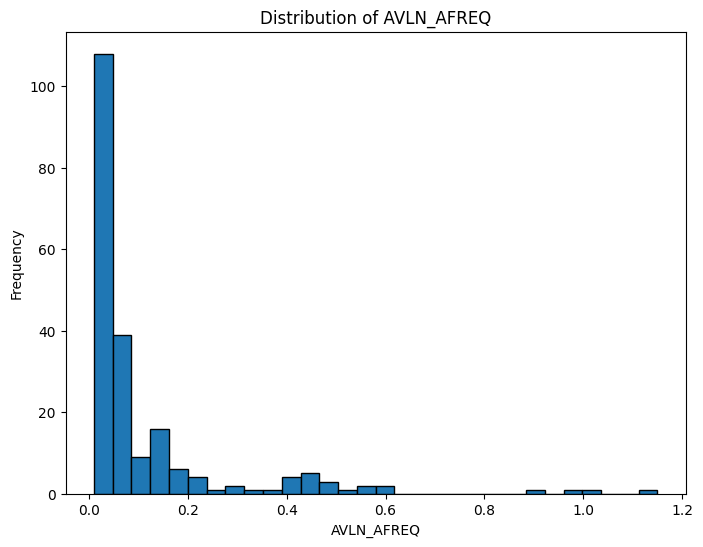

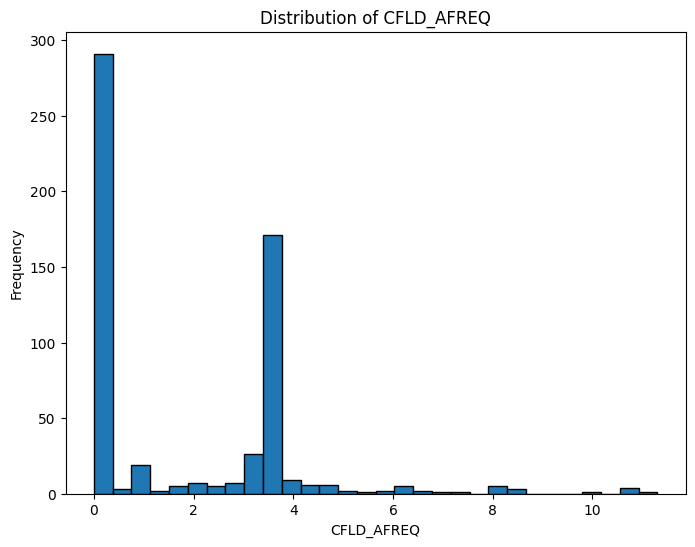

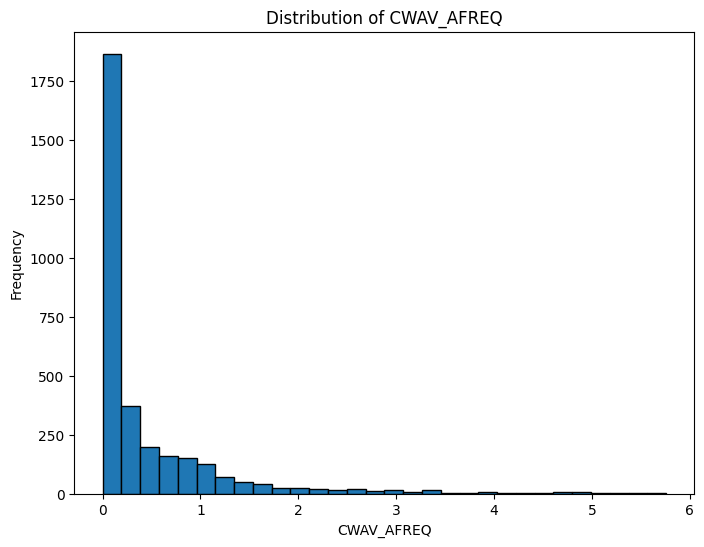

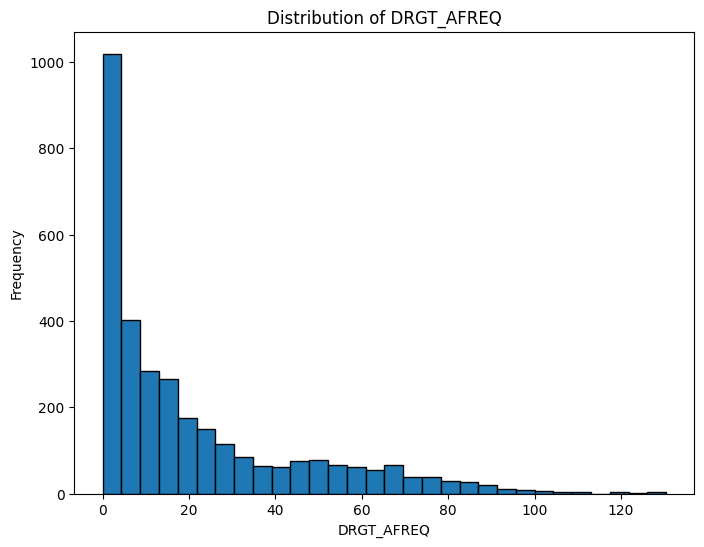

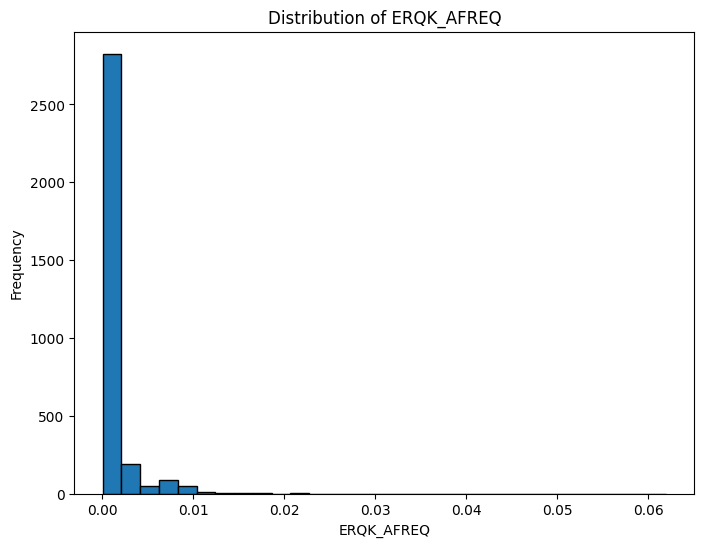

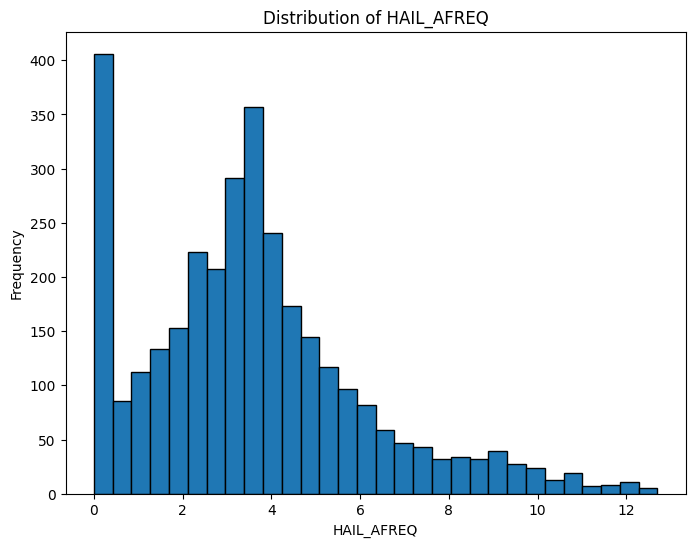

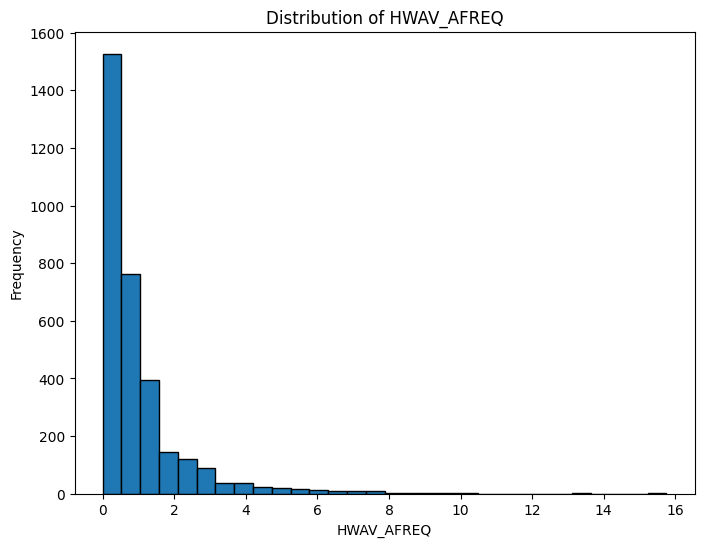

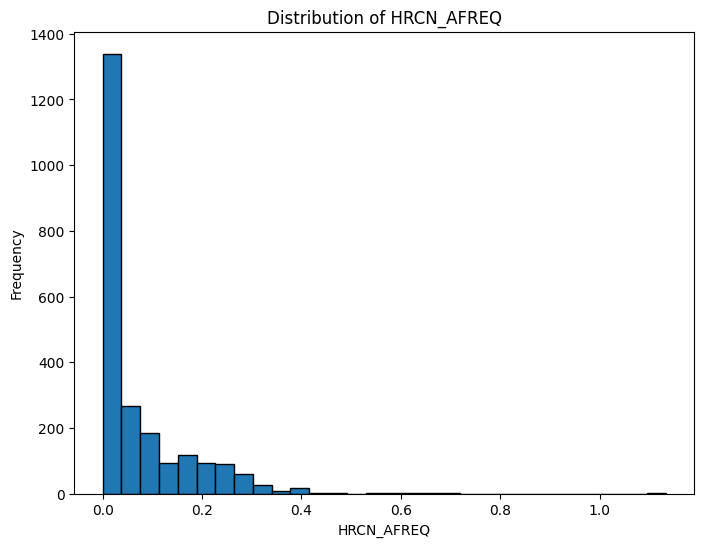

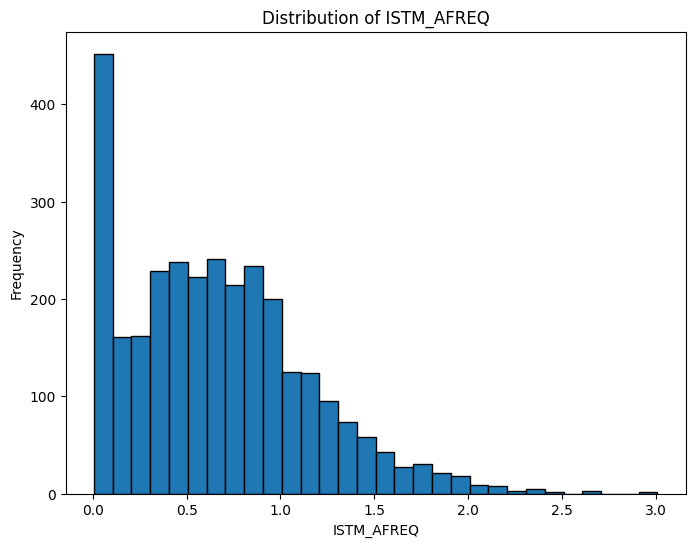

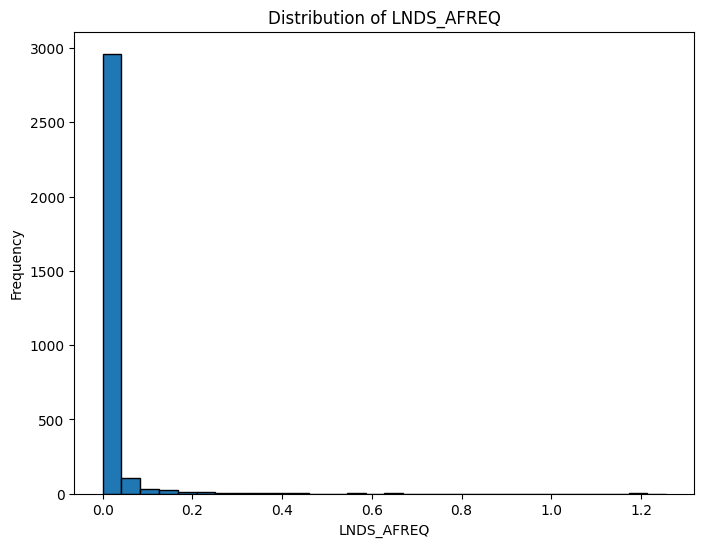

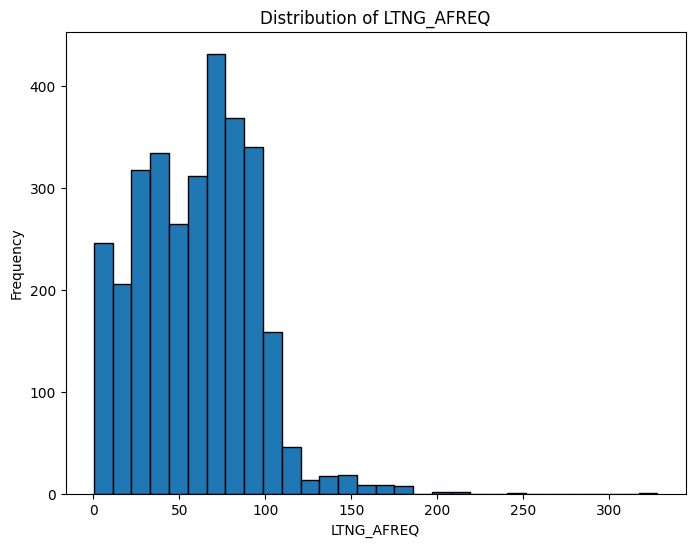

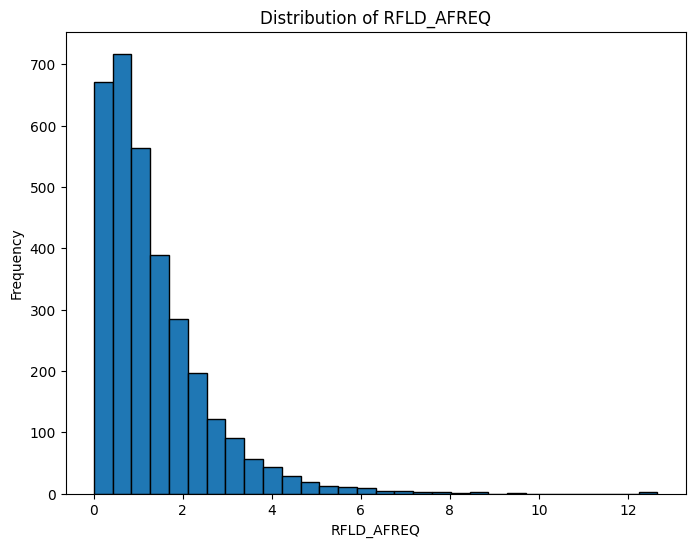

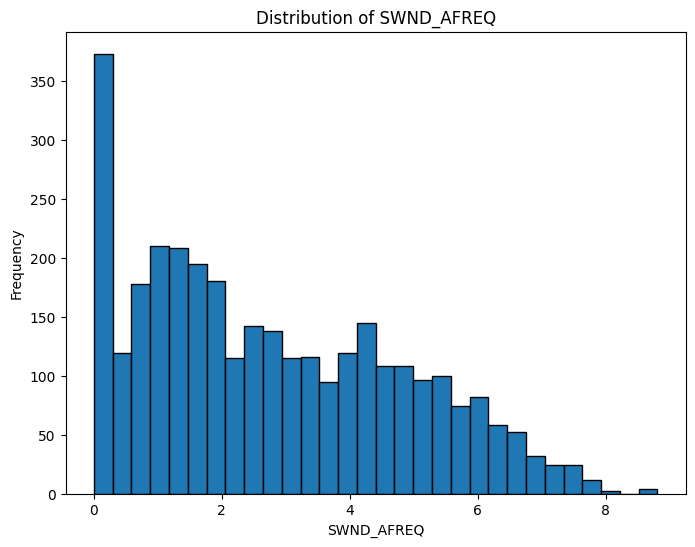

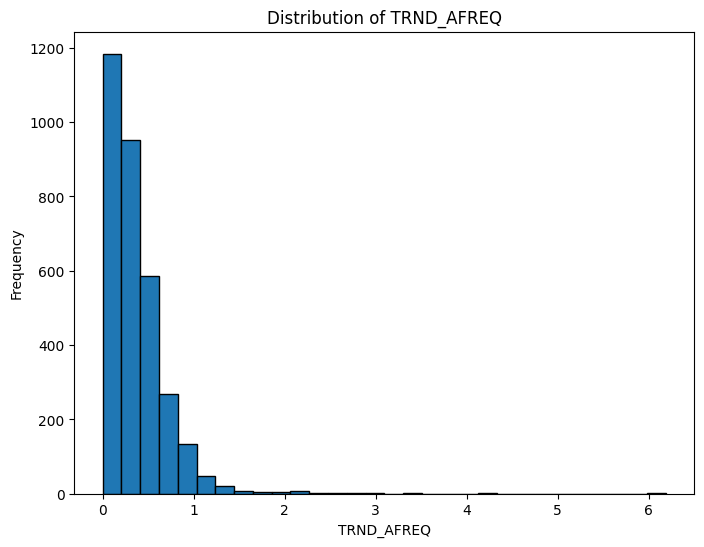

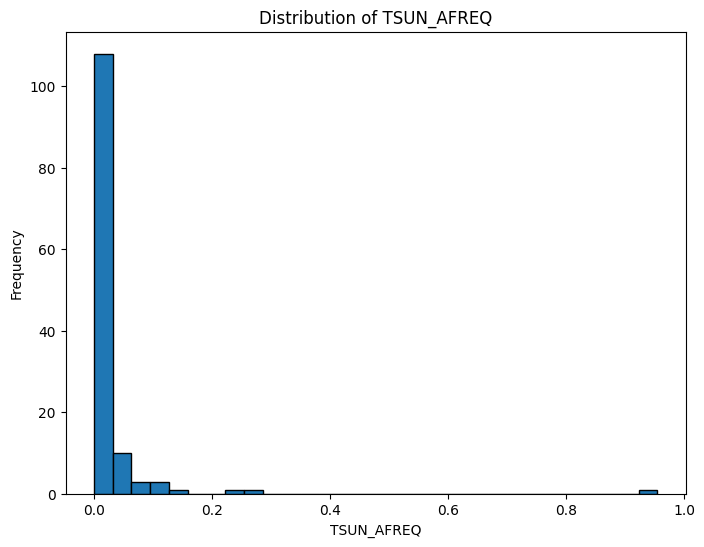

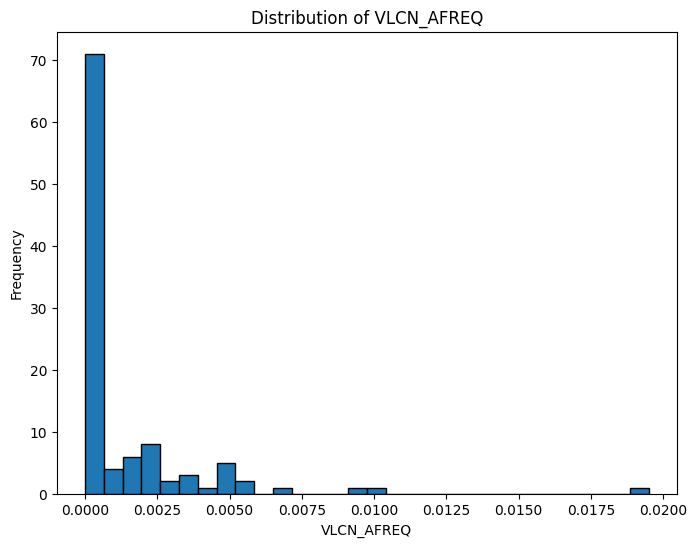

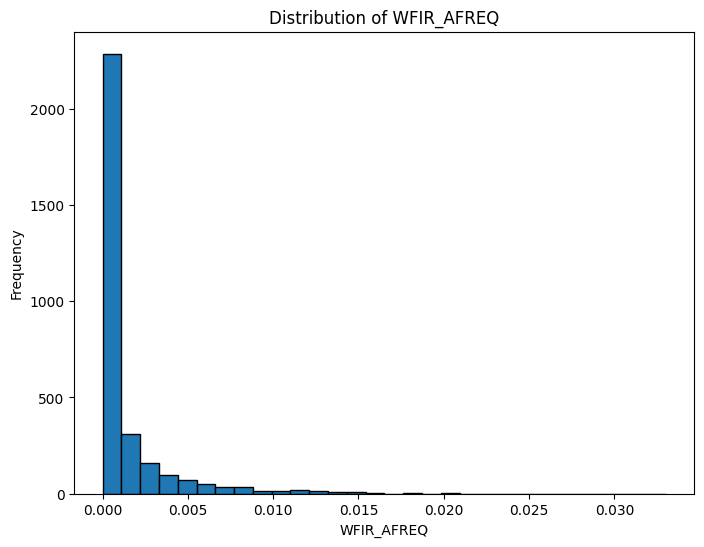

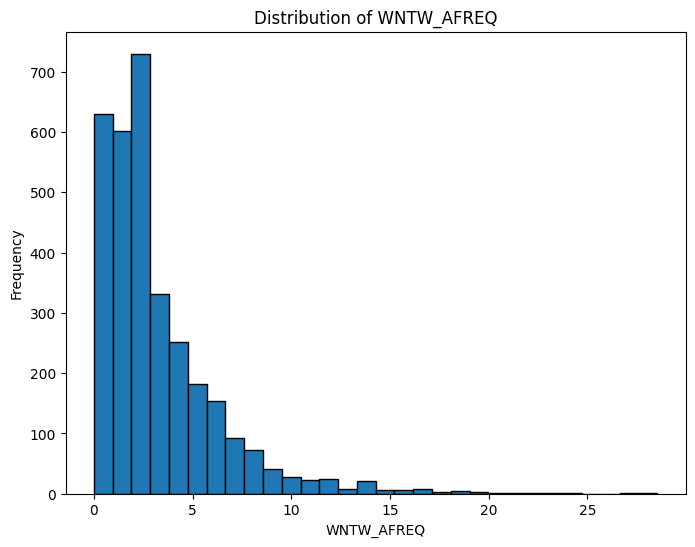

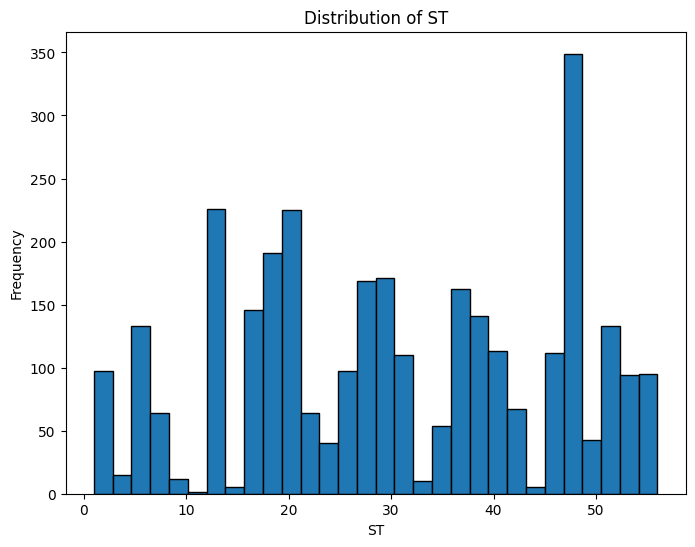

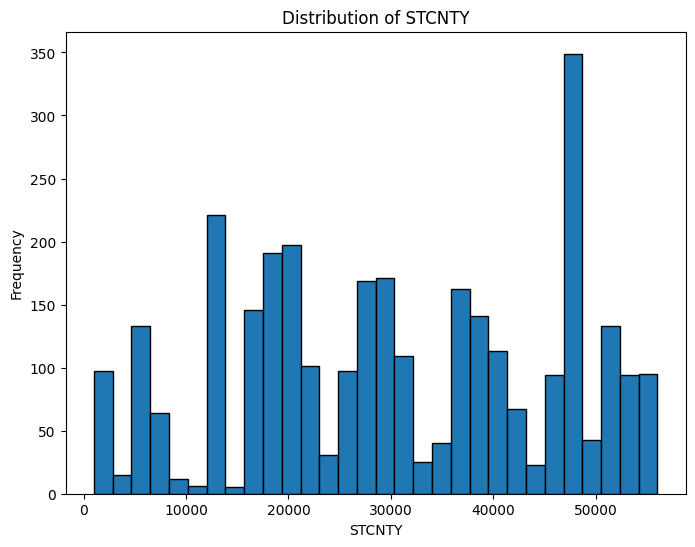

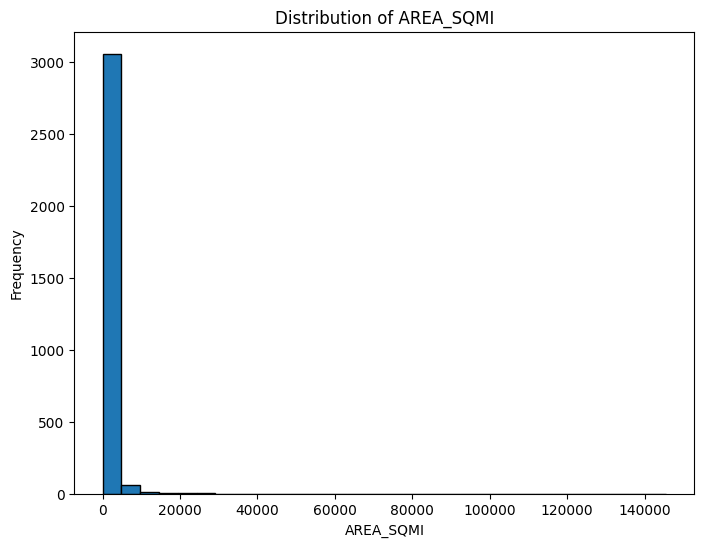

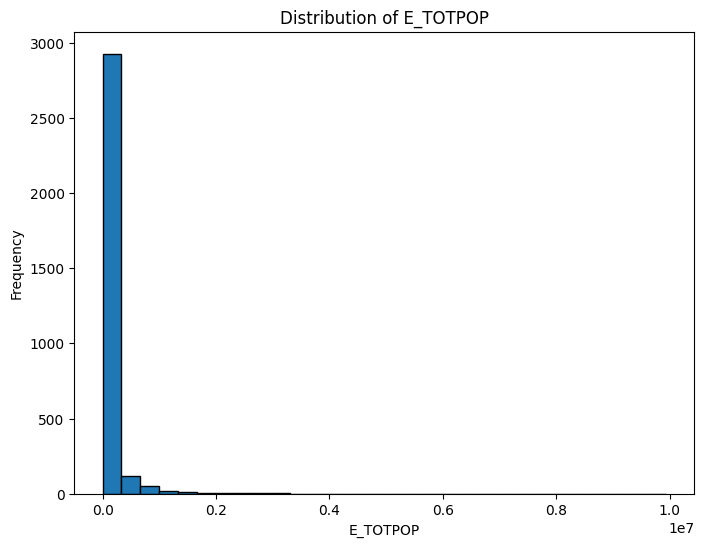

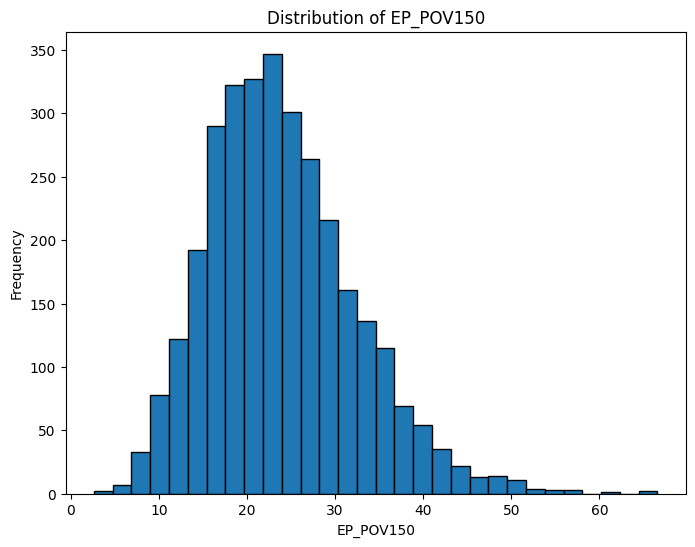

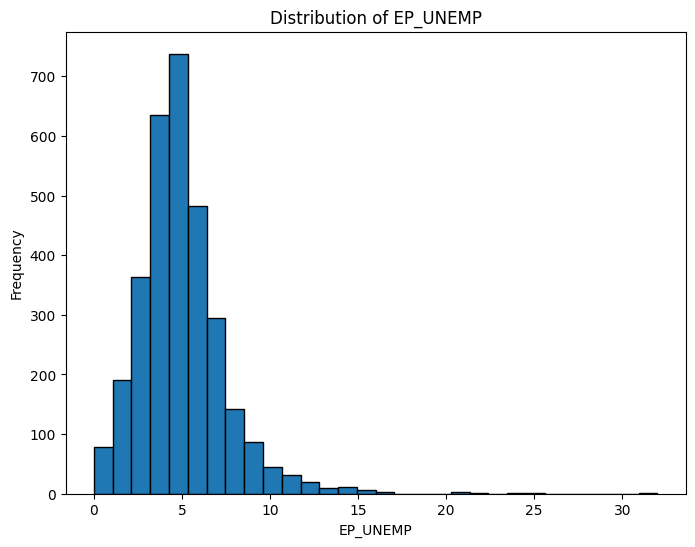

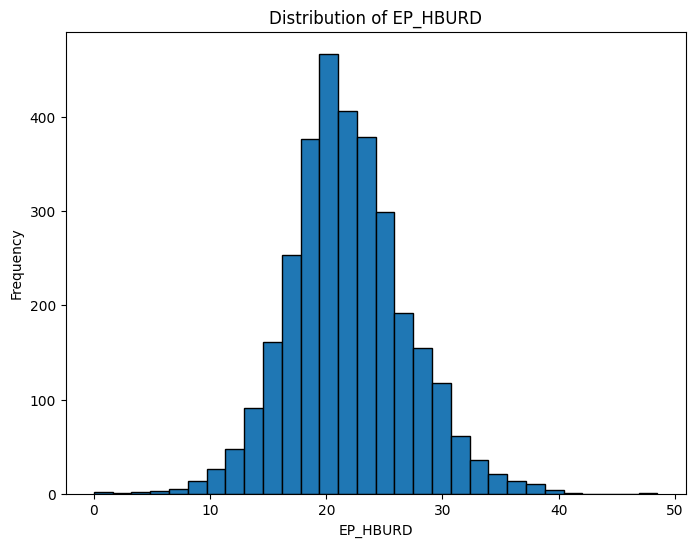

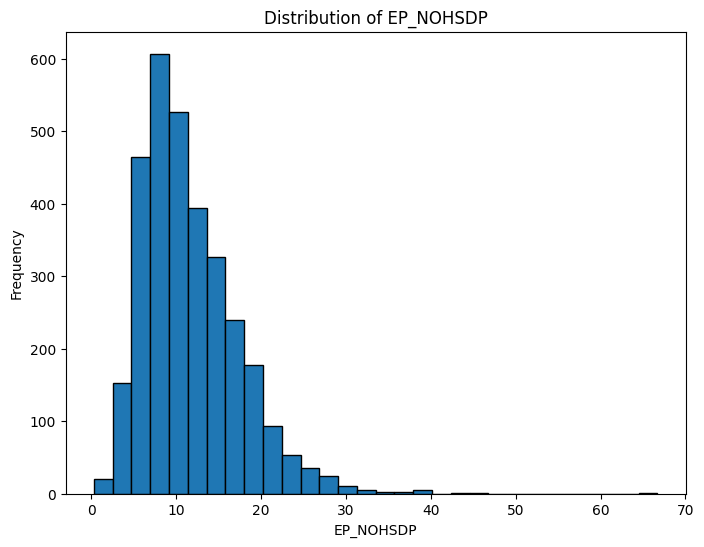

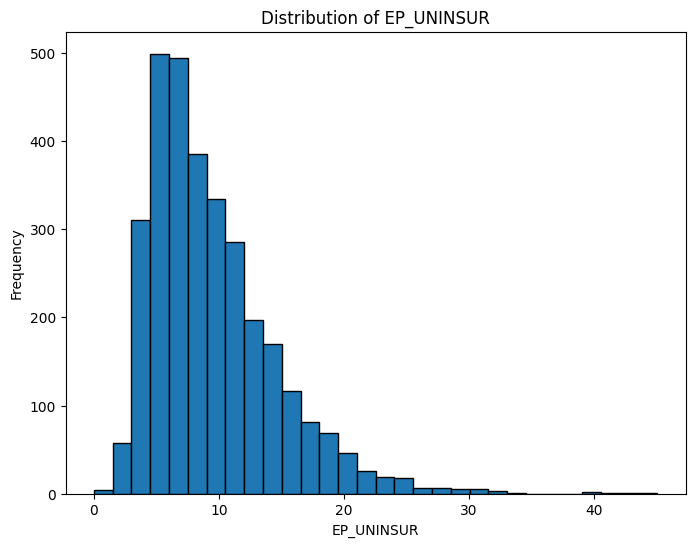

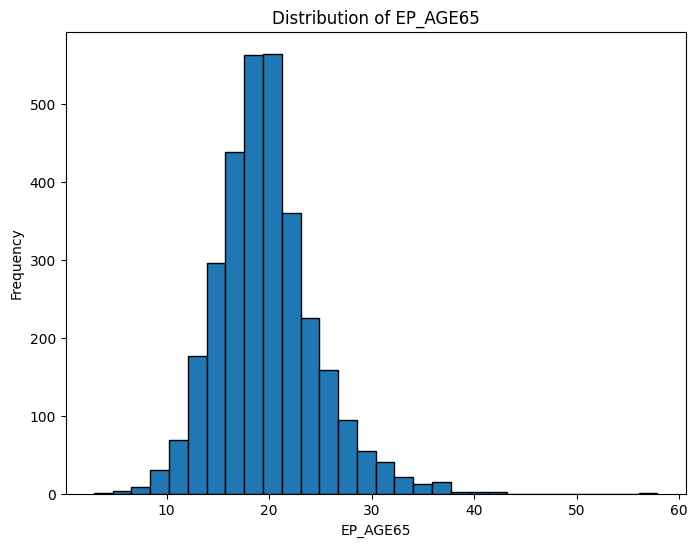

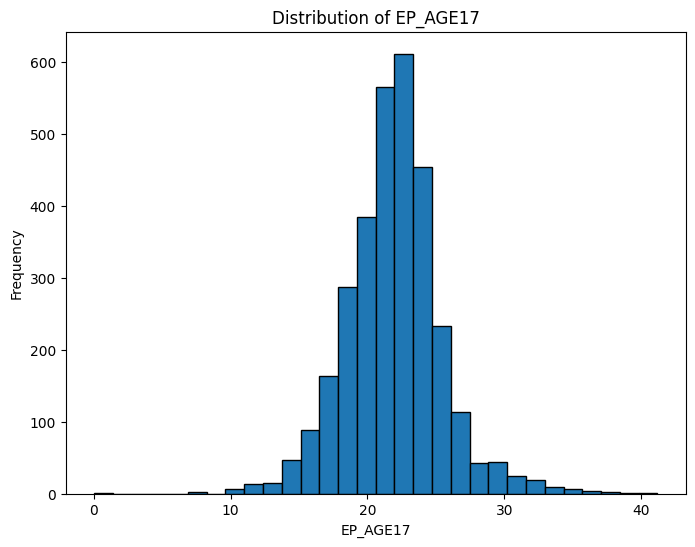

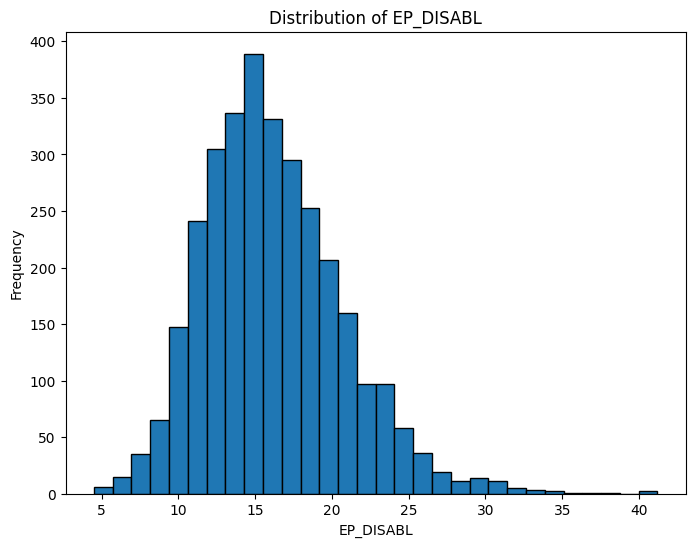

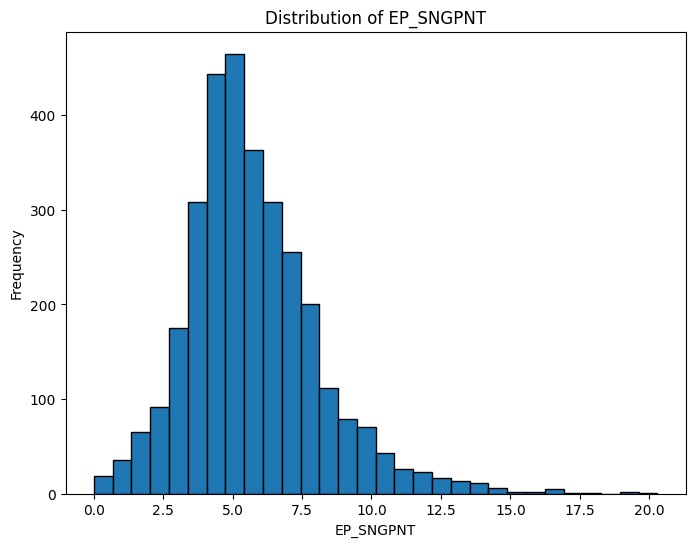

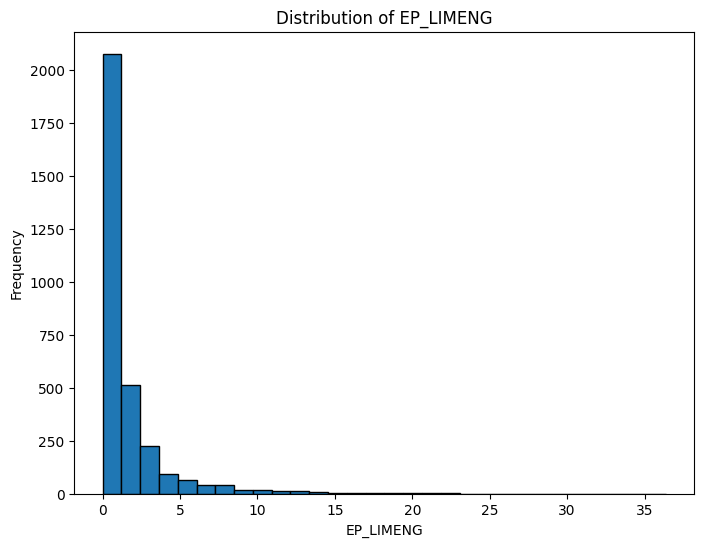

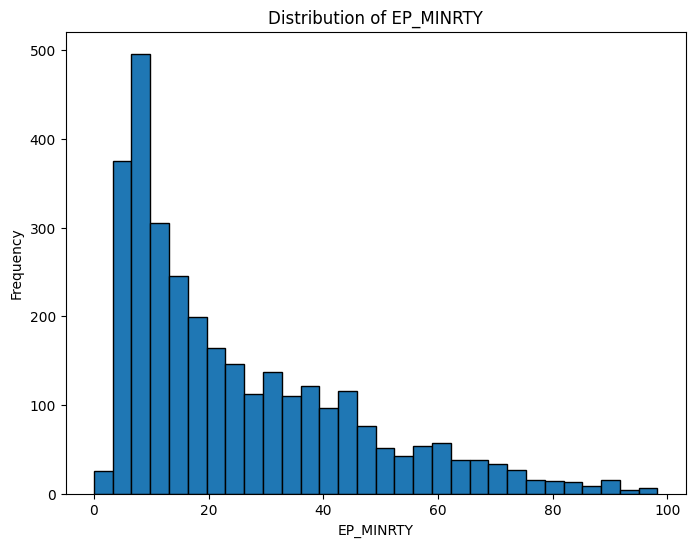

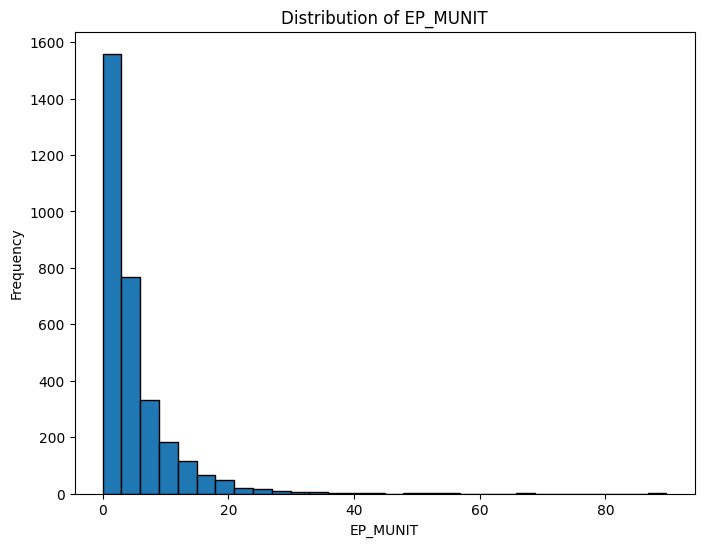

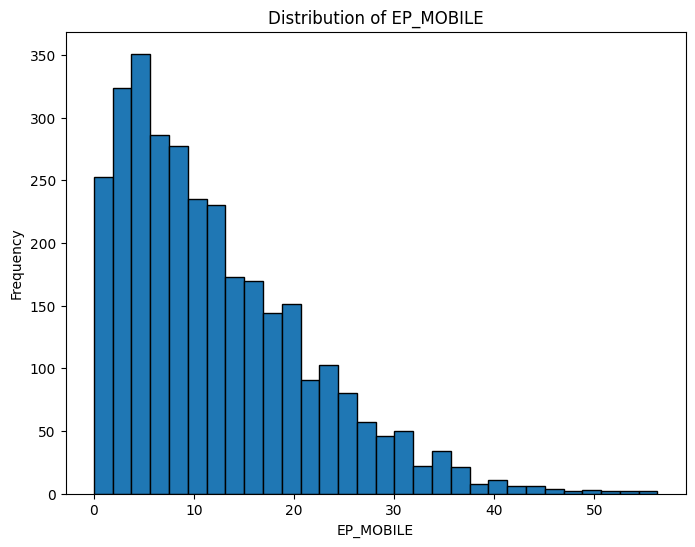

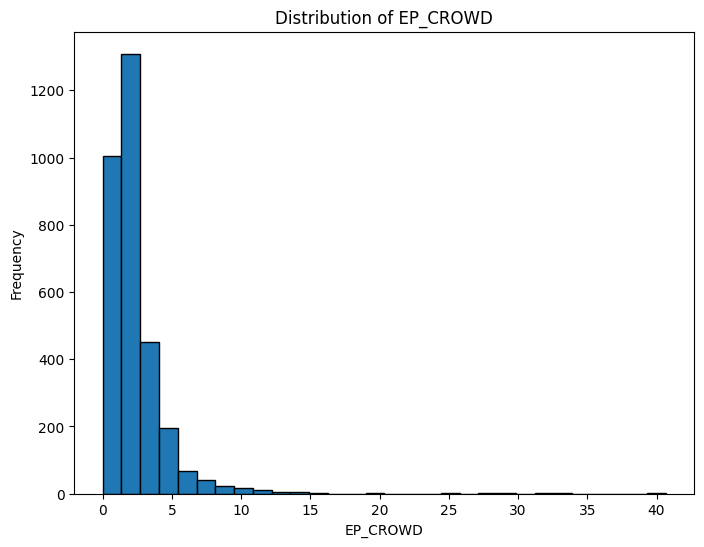

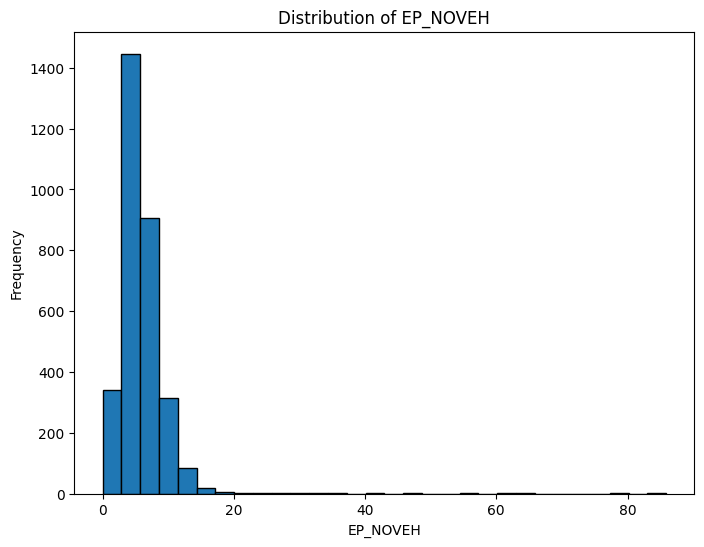

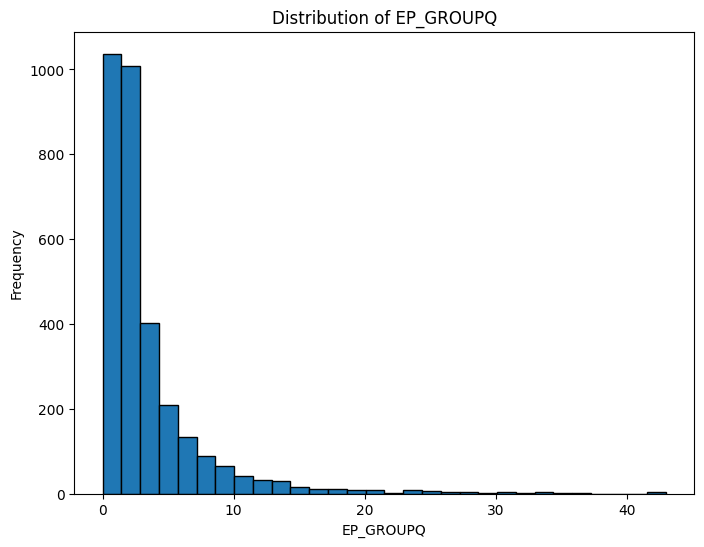

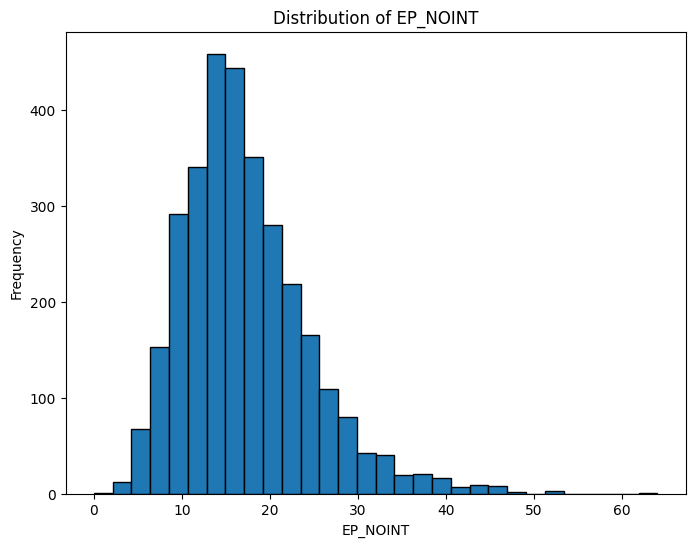

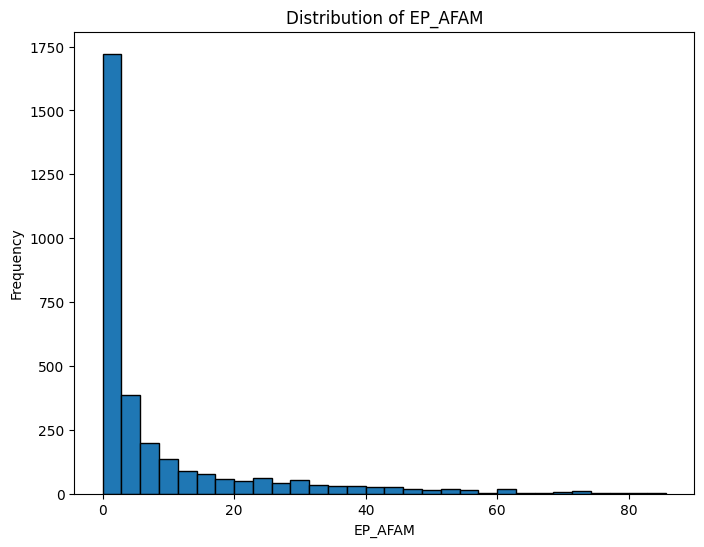

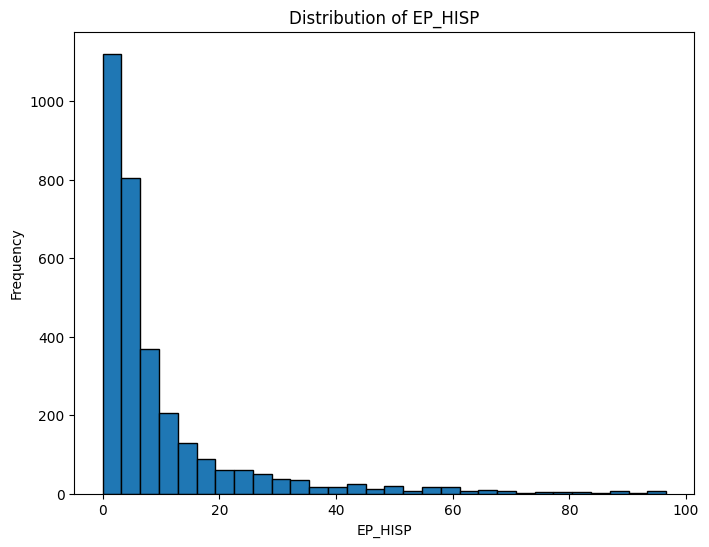

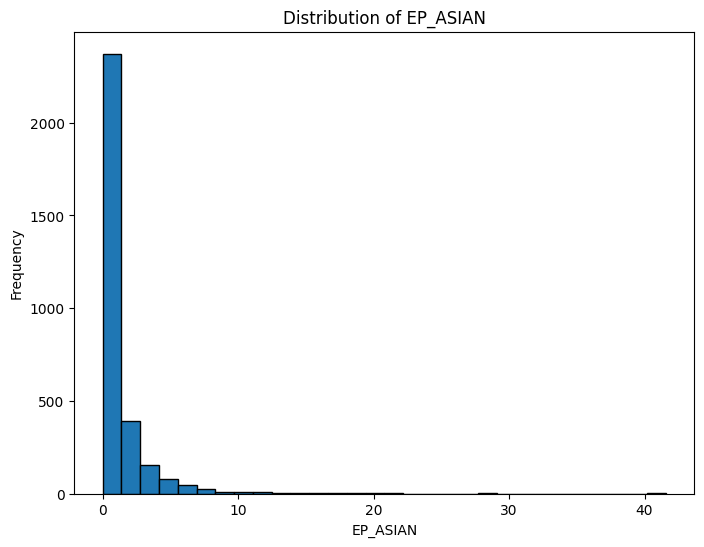

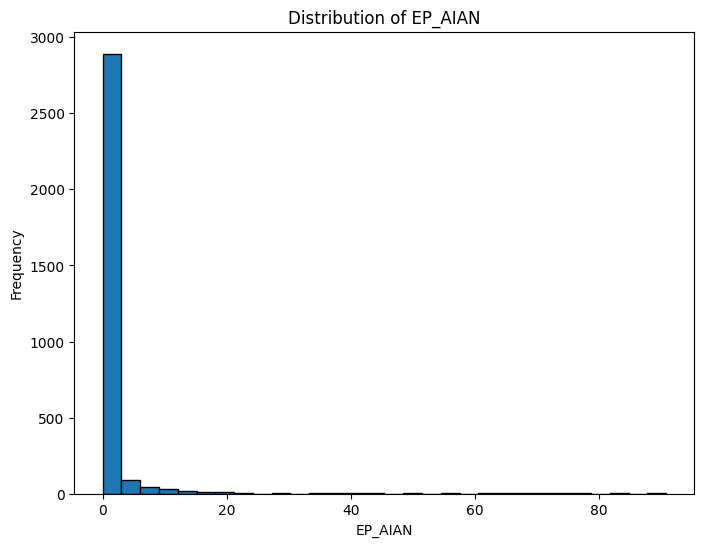

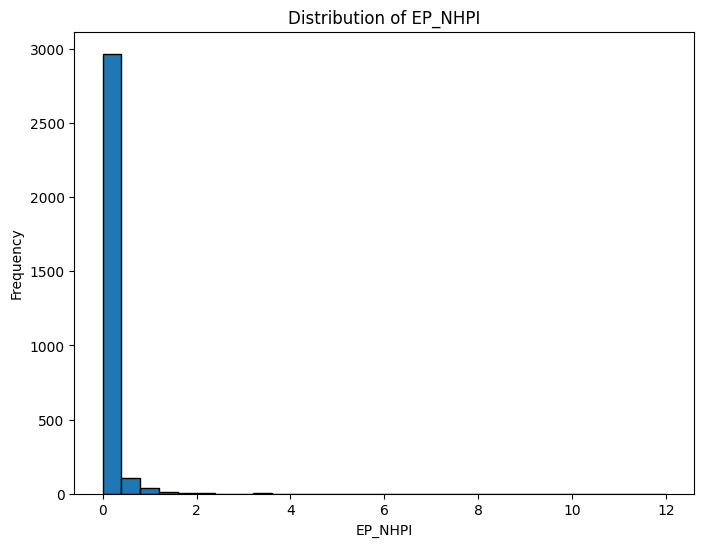

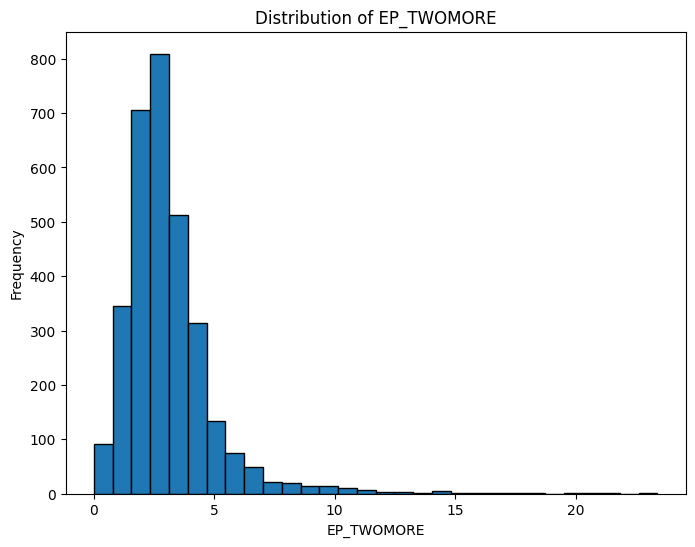

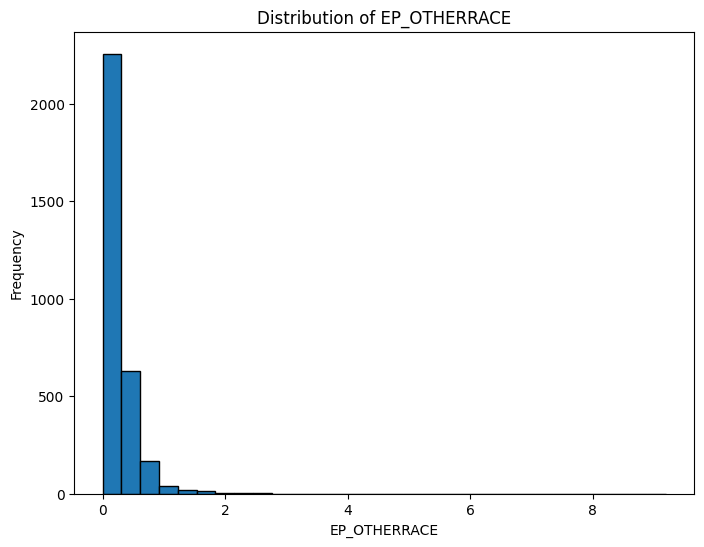

In [18]:
import matplotlib.pyplot as plt
# Function to plot a histogram for a given column
def plot_histogram(column_name):
    plt.figure(figsize=(8, 6))
    merged_data[column_name].dropna().hist(bins=30, edgecolor='black')
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()

# Identify numerical columns in the merged dataset
numerical_columns = merged_data.select_dtypes(include=['float64', 'int64']).columns

# Display the numerical columns (optional, to verify)
print(numerical_columns)

# Loop through each numerical column and plot the histogram
for col in numerical_columns:
    plot_histogram(col)